In [56]:
# npfiles = ['raw_accuracies.npy', 'tucker20_reconstructed.npy', 'tucker10_reconstructed.npy', 'tucker20_core.npy', \
#            'tucker10_core.npy', 'cp5_accuracies.npy', 'cp4_accuracies.npy', 'scaled_accuracies.npy']
# npfiles = ['100cvs_raw_accuracies.npy', '100cvs_scaled_accuracies.npy', '100cvs_tucker10_core.npy', \
#            '100cvs_tucker10_reconstructed.npy', '100cvs_tucker20_core.npy', '100cvs_cp5_accuracies.npy', \
#           '100cvs_tucker20_reconstructed.npy', '100cvs_cp4_accuracies.npy']
npfiles = ['100cvs_tucker20_reconstructed.npy', '100cvs_tucker20_core.npy', \
           '100cvs_tucker10_reconstructed.npy', '100cvs_tucker10_core.npy', \
           '100cvs_raw_accuracies.npy', '100cvs_cp5_accuracies.npy', \
           '100cvs_cp4_accuracies.npy', '100cvs_scaled_accuracies.npy', \
           '100cvs_tucker100_core.npy', '100cvs_tucker100_reconstruction.npy', \
           '100cvs_tucker200_core.npy', '100cvs_tucker200_reconstruction.npy', \
           '100cvs_tucker50_core.npy', '100cvs_tucker50_reconstruction.npy']

In [57]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats
import seaborn as sns

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h, h

In [58]:
stats_df = pd.DataFrame(columns=['Filename', 'Median', 'Interval-', 'Mean', 'Interval+', 'Samples', 'h (%)'])
for i in range(len(npfiles)):
    x = np.load(npfiles[i]).item()
    x = x.values()
    m, mdown, mup, h = mean_confidence_interval(x, confidence=0.95)
    median = np.median(x)
    s = len(x)
    stats_df = pd.concat([stats_df, pd.DataFrame([[npfiles[i], median, mdown, m, mup, s, h*100]], columns=['Filename', \
                                    'Median', 'Interval-', 'Mean', 'Interval+', 'Samples', 'h (%)'])], axis=0, ignore_index=True)

In [68]:
stats_df.sort_values(by='Mean', ascending=False)

,Filename,Median,Interval-,Mean,Interval+,Samples,h (%)
0,100cvs_tucker20_reconstructed.npy,0.932791,0.928984,0.931037,0.933091,100.0,0.205320
1,100cvs_tucker20_core.npy,0.929764,0.926820,0.928865,0.930909,100.0,0.204487
10,100cvs_tucker200_core.npy,0.930808,0.926745,0.928750,0.930754,100.0,0.200428
8,100cvs_tucker100_core.npy,0.929660,0.926445,0.928620,0.930796,100.0,0.217548
2,100cvs_tucker10_reconstructed.npy,0.930182,0.926434,0.928501,0.930569,100.0,0.206745
12,100cvs_tucker50_core.npy,0.931330,0.925861,0.928435,0.931009,99.0,0.257394
3,100cvs_tucker10_core.npy,0.929869,0.926443,0.928425,0.930407,96.0,0.198218
9,100cvs_tucker100_reconstruction.npy,0.928929,0.926251,0.928215,0.930179,100.0,0.196401
13,100cvs_tucker50_reconstruction.npy,0.930077,0.926090,0.928043,0.929995,99.0,0.195230
11,100cvs_tucker200_reconstruction.npy,0.930703,0.925389,0.927933,0.930477,99.0,0.254435


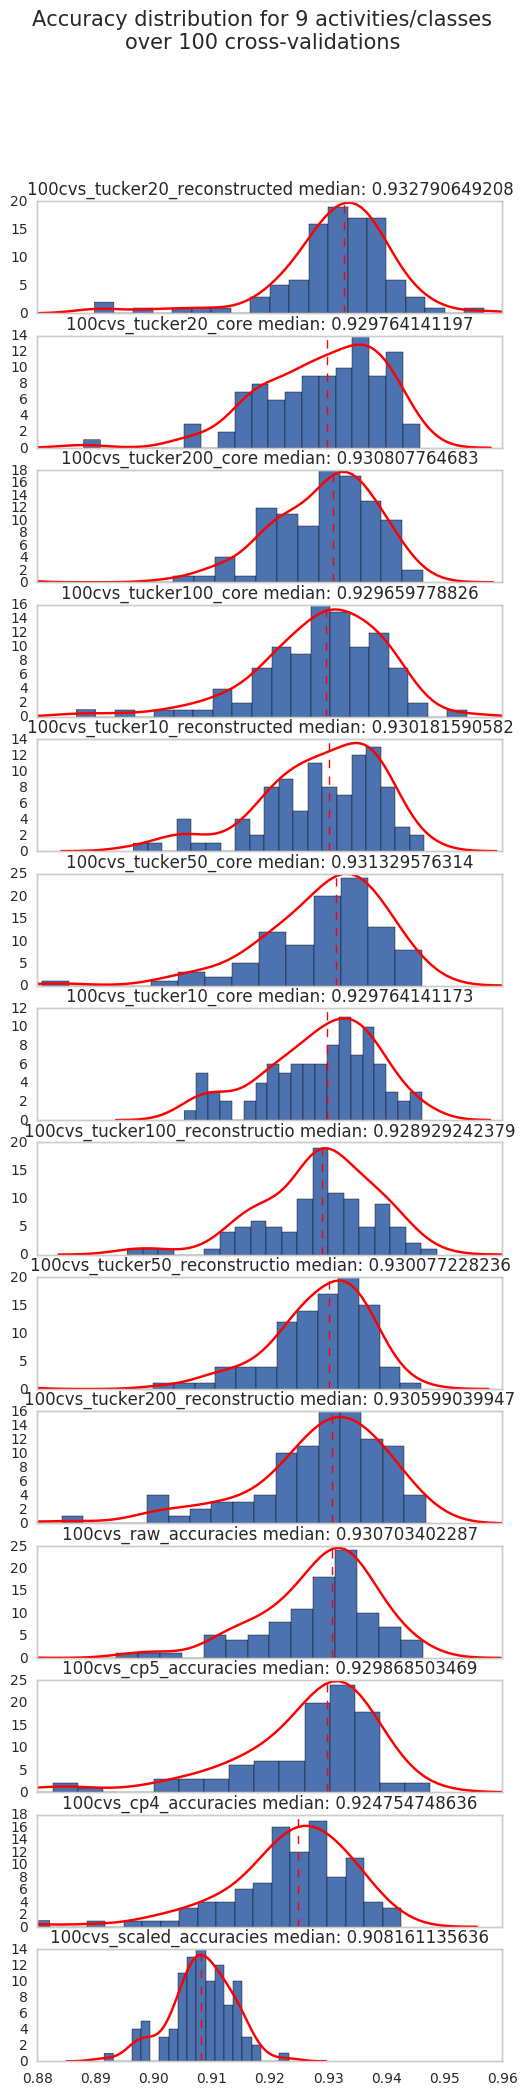

In [70]:
files_by_median = stats_df.sort_values(by='Mean', ascending=False).Filename.values
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure(figsize=(6, 24))
plt.suptitle('Accuracy distribution for 9 activities/classes\nover 100 cross-validations', fontsize=15)
for i in range(len(files_by_median)):
    axarr = plt.subplot(len(files_by_median), 1, i+1, sharex=axarr) #
    axarr2 = axarr.twinx()
    x = np.load(files_by_median[i]).item()
    axarr.hist(x.values(), bins=20)
    sns.kdeplot(x.values(), ax=axarr2, color='r')
    mean_ = np.median(x.values())
    axarr.axvline(x=mean_, linewidth=1, color='r', ls='--')
    axarr.set_title('{} median: {}'.format(files_by_median[i].strip('.npy'), mean_))
    axarr2.axes.get_yaxis().set_visible(False)
    if i != len(files_by_median)-1:
        axarr.axes.get_xaxis().set_visible(False)
plt.xlim(0.88, 0.96)
plt.savefig('100_Effects of Data Compression on DeepNet for Activity Recognition.png', dpi=350)
plt.show()